In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the IMDb data with pandas
df = pd.read_csv('./data/IMDb/IMDb movies.csv')

/opt/miniconda3/envs/ada/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cleaning the IMDb data. First we fix some typo in the **'worldwide_gross_income'** column, transform the **'year'** attribute into integers, filter the data in the desired range, transform all attributes representing money to integers and remove the currencies (**'budget'**, **'worldwide_gross_income'** nad **'usa_gross_income'**). Finally we deal with tha dates, by changing the strings to datetime objects.

In [3]:
def clean_imdb(df):
    imdb = df.rename(columns = {'worlwide_gross_income':'worldwide_gross_income'})
    imdb = imdb.drop(imdb.index[83917])
    imdb['year'] = imdb['year'].astype(int)
    imdb = imdb[imdb['year']>2014]
    imdb = imdb.dropna()
    imdb['budget'] = imdb['budget'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['worldwide_gross_income'] = imdb['worldwide_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['usa_gross_income'] = imdb['usa_gross_income'].map(lambda x: x.lstrip('$EURCZKNYGBPWILSADMXNJPYOP')).astype(int)
    imdb['date_published'] = pd.to_datetime(imdb['date_published'])
    return imdb

imdb = clean_imdb(df)

We decided to work with the ten most successful movies in terms of usa gross income from 2015 to 2020

In [4]:
movies = imdb.sort_values(['worldwide_gross_income'], ascending=False).groupby('year').head(10)
movies.shape

(60, 22)

In [5]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worldwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [6]:
movies.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,60.000000,60.000000,60.00000,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,60.00000,60.00000,60.00000
mean,2017.500000,123.616667,7.01500,359366.883333,1.570767e+08,3.411501e+08,9.483331e+08,62.15000,2047.75000,461.70000
std,1.722237,19.194007,0.83885,238902.775898,7.873551e+07,2.012070e+08,5.153396e+08,15.08712,2171.29857,185.24334
min,2015.000000,87.000000,4.20000,6558.000000,7.000000e+06,2.721100e+06,3.085539e+07,22.00000,81.00000,40.00000
25%,2016.000000,108.750000,6.57500,186655.500000,9.000000e+07,2.158799e+08,7.736708e+08,52.75000,736.50000,340.00000
50%,2017.500000,124.000000,7.00000,321625.500000,1.600000e+08,3.357485e+08,8.937796e+08,64.00000,1307.50000,453.50000
75%,2019.000000,136.250000,7.62500,548393.250000,2.000000e+08,4.286319e+08,1.154860e+09,74.25000,2233.50000,594.50000
max,2020.000000,181.000000,8.50000,882037.000000,3.560000e+08,9.366622e+08,2.797801e+09,94.00000,10472.00000,909.00000


let's check the genres of the selected movies

<BarContainer object of 15 artists>

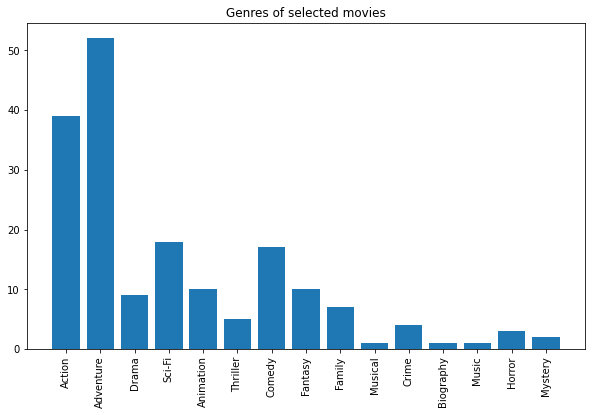

In [7]:
from collections import Counter
genres = [genres.split() for genres in movies['genre'].tolist()]
labels, values = zip(*Counter([genre.replace(',', '') for genre_list in genres for genre in genre_list]).items())
plt.figure(figsize = (10,6))
plt.title('Genres of selected movies')
plt.xticks(rotation=90)
plt.bar(labels, values)

Check the release dates of the movies

In [8]:
movies[['original_title', 'date_published']].sort_values(by='date_published')

,original_title,date_published
68760,Fast & Furious 7,2015-04-02
67001,Avengers: Age of Ultron,2015-04-22
43822,Jurassic World,2015-06-11
66843,Mission: Impossible - Rogue Nation,2015-08-19
66053,Minions,2015-08-27
64523,Inside Out,2015-09-16
72101,The Martian,2015-10-01
66824,Spectre,2015-11-05
63408,The Hunger Games: Mockingjay - Part 2,2015-11-19
67523,Star Wars: Episode VII - The Force Awakens,2015-12-16


Now let's visualize the IMDb ratings as well, we scatter the critics' ratings (metascore) against the users' raatings (avg_vote)

<AxesSubplot:title={'center':'User ratings vs critics ratings (metascore)'}, xlabel='avg_vote', ylabel='metascore'>

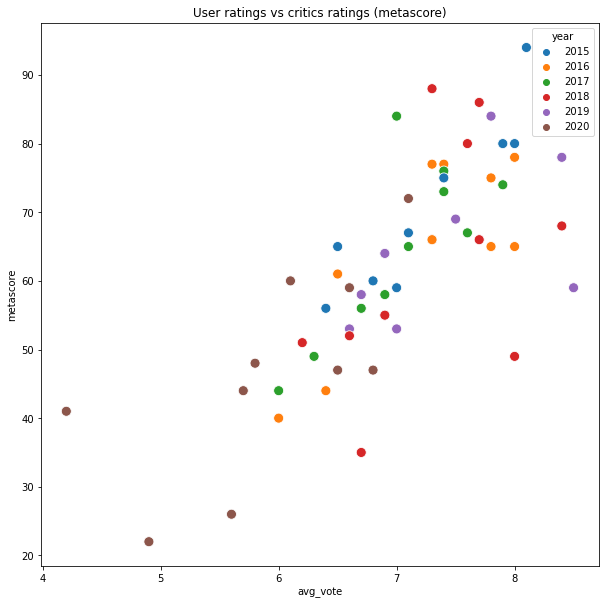

In [9]:
plt.figure(figsize = (10,10))
plt.title('User ratings vs critics ratings (metascore)')
sns.scatterplot(data=movies, x="avg_vote", y="metascore", hue='year', palette='tab10', s=100)

We could also scatter the budget against the box office, it looks like in 2020 producers spent less money on movies and also less people went to the cinama. This has something to do with COVID-19, looks like we have a confounder. So we should keep this in mind in our project later!

<AxesSubplot:title={'center':'Budget vs worldwide income of selected movies per year'}, xlabel='budget', ylabel='worldwide_gross_income'>

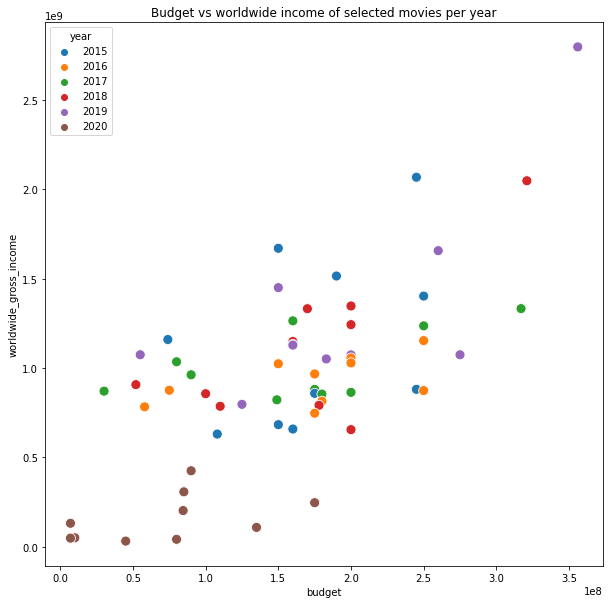

In [10]:
plt.figure(figsize = (10,10))
plt.title('Budget vs worldwide income of selected movies per year')
sns.scatterplot(data=movies, x='budget', y='worldwide_gross_income', hue='year', palette='tab10', s=100)

Now we take a look at the distribution of the votes and total incomes, we denote the median with red dotted line

In [11]:
mean = movies['avg_vote'].median()
std = movies['avg_vote'].std()
print(f'       mean        of movie rating: {"{:.2f}".format(mean)}')
print(f'standard deviation of movie rating: {"{:.2f}".format(std)}')

       mean        of movie rating: 7.00
standard deviation of movie rating: 0.84


<AxesSubplot:title={'center':'IMDb rating'}, xlabel='avg_vote', ylabel='Count'>

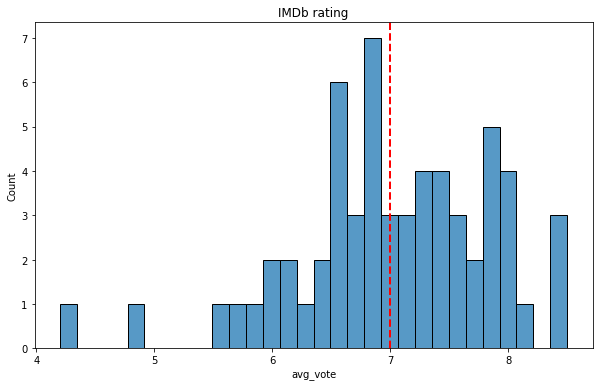

In [12]:
plt.figure(figsize = (10,6))
plt.title('IMDb rating')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
sns.histplot(data = movies['avg_vote'], bins=30)

In [13]:
median = movies['worldwide_gross_income'].median()
mean = movies['worldwide_gross_income'].mean()
std = movies['worldwide_gross_income'].std()
print(f'      median       of worldwide gross income: $ {"{:.2f}".format(median)}')
print(f'standard deviation of worldwide gross income: $ {"{:.2f}".format(std)}')

      median       of worldwide gross income: $ 893779649.50
standard deviation of worldwide gross income: $ 515339641.39


<AxesSubplot:title={'center':'Box office'}, xlabel='worldwide_gross_income', ylabel='Count'>

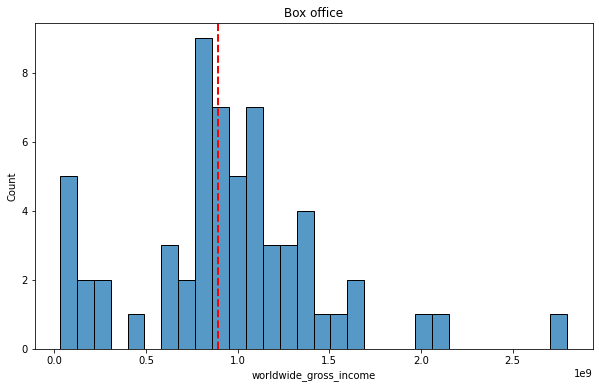

In [14]:
plt.figure(figsize = (10,6))
plt.title('Box office')
plt.axvline(movies['worldwide_gross_income'].median(), color='r', linestyle='dashed', linewidth=2)
sns.histplot(data = movies['worldwide_gross_income'], bins=30)

Finally let's have a look at the actual values of the box office

In [15]:
movies[['original_title', 'worldwide_gross_income']].sort_values(by='worldwide_gross_income', ascending=False)

,original_title,worldwide_gross_income
73865,Avengers: Endgame,2797800564
67523,Star Wars: Episode VII - The Force Awakens,2068224036
73864,Avengers: Infinity War,2048359754
43822,Jurassic World,1670401444
79633,The Lion King,1656963790
68760,Fast & Furious 7,1515048151
74934,Frozen II,1450026933
67001,Avengers: Age of Ultron,1402808753
62334,Black Panther,1347280838
67676,Star Wars: Episode VIII - The Last Jedi,1332540187


Now we filter the Quotebank data based and look for quotes on the above mentioned movies. We search for the title of the movie in the **'quotation'** field of the Quotebank data. For more details, see **filter_quotes.ipynb**. After the filtering, we do some preprocessing on the quotes in **preprocessingQuotebank.ipynb**. The results are saved as a pickle file, let's load them and see what we have.

In [16]:
quotes = pd.read_pickle('./data/Quotebank_wSentiment.pkl')

We can count the number of quotes found in a movie, although it does not tell the full story, let us consider the number of occurances as well

In [17]:
quotes.groupby('movie').count()['quotation'].sort_values(ascending=False).head(15)

movie
Star Wars: Episode VII - The Force Awakens       4479
Mission: Impossible - Fallout                    4051
Star Wars: Episode VIII - The Last Jedi          4043
Star Wars: Episode IX - The Rise of Skywalker    3354
Thor: Ragnarok                                   3188
Avengers: Infinity War                           2783
Avengers: Endgame                                2692
Black Panther                                    2252
Wonder Woman                                     2123
Spider-Man: Homecoming                           1816
Spider-Man: Far from Home                        1555
Captain America: Civil War                       1452
Joker                                            1304
Captain Marvel                                   1063
Avengers: Age of Ultron                          1054
Name: quotation, dtype: int64

In [18]:
quotes.groupby('movie').sum()['numOccurrences'].sort_values(ascending=False)


movie
Star Wars: Episode VII - The Force Awakens                             6114
Star Wars: Episode VIII - The Last Jedi                                5658
Mission: Impossible - Fallout                                          5365
Star Wars: Episode IX - The Rise of Skywalker                          4579
Thor: Ragnarok                                                         4372
Avengers: Infinity War                                                 3983
Avengers: Endgame                                                      3771
Black Panther                                                          3087
Wonder Woman                                                           3039
Spider-Man: Homecoming                                                 2565
Spider-Man: Far from Home                                              2098
Captain America: Civil War                                             1955
Joker                                                                  1748
Captai

Now we merge the total number of occurences for each movie with the **movies** dataframe, the new column is simply called **nmOccurrences**

In [19]:
movies = movies.merge(quotes.groupby('movie').sum()['numOccurrences'],left_on='original_title', right_index=True)

In [20]:
movies.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics,numOccurrences
73865,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,2019-04-24,"Action, Adventure, Drama",181,USA,"English, Japanese, Xhosa, German","Anthony Russo, Joe Russo",...,After the devastating events of,8.4,754786,356000000,858373000,2797800564,78.0,8869.0,557.0,3771
67523,tt2488496,Star Wars - Il risveglio della Forza,Star Wars: Episode VII - The Force Awakens,2015,2015-12-16,"Action, Adventure, Sci-Fi",138,USA,English,J.J. Abrams,...,"As a new threat to the galaxy rises, Rey, a de...",7.9,845102,245000000,936662225,2068224036,80.0,4822.0,909.0,6114
73864,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,2018-04-25,"Action, Adventure, Sci-Fi",149,USA,English,"Anthony Russo, Joe Russo",...,The Avengers and their allies must be willing ...,8.4,796486,321000000,678815482,2048359754,68.0,4273.0,611.0,3983
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,"A new theme park, built on the original site o...",7.0,569512,150000000,652270625,1670401444,59.0,1537.0,698.0,323
79633,tt6105098,Il Re Leone,The Lion King,2019,2019-08-21,"Animation, Adventure, Drama",118,"USA, UK, South Africa","English, Xhosa, Zulu, French, Spanish",Jon Favreau,...,"After the murder of his father, a young lion p...",6.9,199521,260000000,543638043,1656963790,55.0,2898.0,370.0,391
68760,tt2820852,Fast & Furious 7,Fast & Furious 7,2015,2015-04-02,"Action, Adventure, Thriller",137,"USA, China, Japan, Canada, United Arab Emirates","English, Thai, Arabic, Spanish",James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,7.1,353562,190000000,353007020,1515048151,67.0,744.0,462.0,23
74934,tt4520988,Frozen II - Il segreto di Arendelle,Frozen II,2019,2019-11-27,"Animation, Adventure, Comedy",103,USA,English,"Chris Buck, Jennifer Lee",...,"Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",6.9,122760,150000000,477373578,1450026933,64.0,1302.0,275.0,35
67001,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,2015-04-22,"Action, Adventure, Sci-Fi",141,USA,"English, Korean",Joss Whedon,...,When Tony Stark and Bruce Banner try to jump-s...,7.3,722685,250000000,459005868,1402808753,66.0,1306.0,693.0,1369
62334,tt1825683,Black Panther,Black Panther,2018,2018-02-14,"Action, Adventure, Sci-Fi",134,USA,"English, Swahili, Nama, Xhosa, Korean",Ryan Coogler,...,"T'Challa, heir to the hidden but advanced king...",7.3,597058,200000000,700426566,1347280838,88.0,3243.0,685.0,3087
67676,tt2527336,Star Wars - Gli ultimi Jedi,Star Wars: Episode VIII - The Last Jedi,2017,2017-12-13,"Action, Adventure, Fantasy",152,USA,English,Rian Johnson,...,Rey develops her newly discovered abilities wi...,7.0,547797,317000000,620181382,1332540187,84.0,6718.0,717.0,5658


We are ready to scatter the number of occurences on a certain movie against the box office


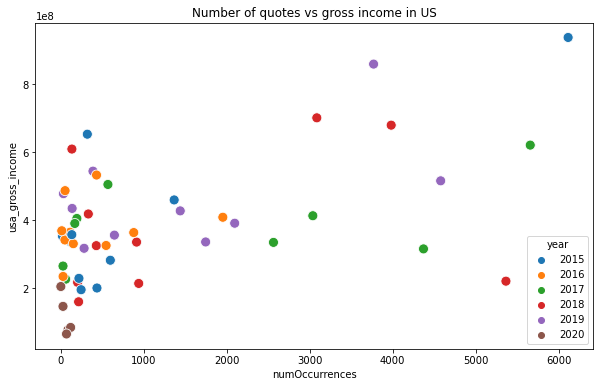

In [21]:
plt.figure(figsize = (10,6))
plt.title('Number of quotes vs gross income in US')
sns.scatterplot(data=movies, x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100);

Check what are the outliers, we have one in 2015, 2018 and 2019

In [22]:
outliers = pd.concat([
movies[movies['year']==2015].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences']),
movies[movies['year']==2018].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences']),
movies[movies['year']==2019].sort_values('numOccurrences').nlargest(1, columns=['numOccurrences'])])
outliers['original_title']

67523       Star Wars: Episode VII - The Force Awakens
76126                    Mission: Impossible - Fallout
67677    Star Wars: Episode IX - The Rise of Skywalker
Name: original_title, dtype: object

<AxesSubplot:title={'center':'Number of quotes vs gross income in US'}, xlabel='numOccurrences', ylabel='usa_gross_income'>

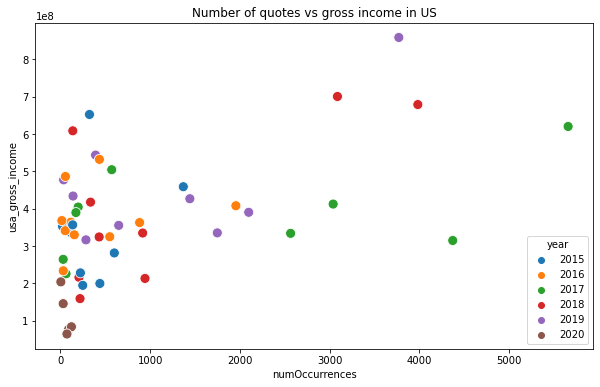

In [23]:
plt.figure(figsize = (10,6))
plt.title('Number of quotes vs gross income in US')
sns.scatterplot(data=movies.drop(index=outliers.index), x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)

Maybe log-log scale?

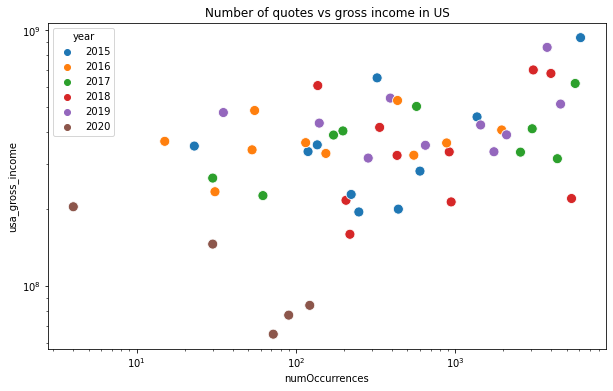

In [24]:
plt.figure(figsize = (10,6))
plt.title('Number of quotes vs gross income in US')
g = sns.scatterplot(data=movies, x='numOccurrences', y='usa_gross_income', hue='year', palette='tab10', s=100)
g.set_xscale('log')
g.set_yscale('log')

In [25]:
quotes.groupby(['speaker', 'movie']).sum()['numOccurrences'].sort_values(ascending=False).head(20)

speaker         movie                                        
Patty Jenkins   Wonder Woman                                     503
Gal Gadot       Wonder Woman                                     497
Rian Johnson    Star Wars: Episode VIII - The Last Jedi          450
Captain Marvel  Captain Marvel                                   407
J.J. Abrams     Star Wars: Episode VII - The Force Awakens       384
Kevin Feige     Avengers: Endgame                                368
                Avengers: Infinity War                           349
Todd Phillips   Joker                                            343
Tom Holland     Spider-Man: Homecoming                           329
Taika Waititi   Thor: Ragnarok                                   329
George Lucas    Star Wars: Episode VII - The Force Awakens       309
Joe Russo       Avengers: Infinity War                           300
J.J. Abrams     Star Wars: Episode IX - The Rise of Skywalker    291
Tom Holland     Spider-Man: Far from Home

Let's focus on a spesific movie, Star Wars: Episode VII - The Force Awakens

In [26]:
quotes[quotes['movie']=='Star Wars: Episode VII - The Force Awakens'].groupby('speaker').sum()['numOccurrences'].sort_values(ascending=False).head(20)

speaker
J.J. Abrams            384
George Lucas           309
Kathleen Kennedy       193
Bob Iger               153
John Boyega            150
JJ Abrams               79
Lupita Nyong ' o        69
Harrison Ford           67
Lawrence Kasdan         64
Daisy Ridley            60
Patrick Bach            57
Carrie Fisher           51
John Williams           51
Mark Hamill             43
Oscar Isaac             42
Gwendoline Christie     41
Ashley Eckstein         40
Quentin Tarantino       36
Amy Poehler             33
Simon Pegg              31
Name: numOccurrences, dtype: int64

We plot the distribution of quotes in time and mark the premier of a the movie with a red line. Also we can observe a spike in the middle of April. It corresponds to the release date of the second teaser trailer on April 16.

Note that, this plot does not really work if on the y axis I plot the number of occurences, because the movie title alone is an outlier and has a big mass at one date point.

In [27]:
quotes['date'] = pd.to_datetime(quotes['date'])

<AxesSubplot:title={'center':'Distributions of quotes in time for StarWars VII'}, xlabel='date', ylabel='Count'>

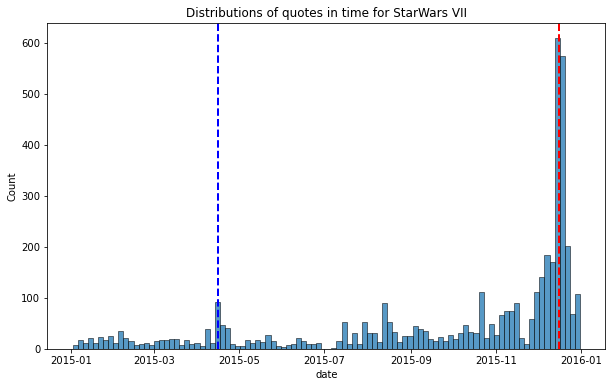

In [28]:
import datetime as dt
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time for StarWars VII')
title = 'Star Wars: Episode VII - The Force Awakens'
star_wars = quotes[quotes['movie']==title]
plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=star_wars['date'], bins=100)

Again there are clearly spikes when a trailer is released for the movie: 2019 April 12, 2019 Oct 22, 2019 Aug 26

<AxesSubplot:title={'center':'Distributions of quotes in time for Star Wars IX'}, xlabel='date', ylabel='Count'>

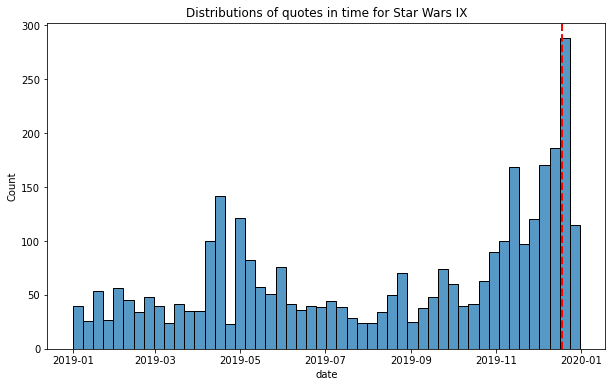

In [29]:
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time for Star Wars IX')
title = 'Star Wars: Episode IX - The Rise of Skywalker'
star_wars = quotes[quotes['movie']==title]
#plt.axvline(dt.date(2015, 4, 16), color='b', linestyle='dashed', linewidth=2)
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=star_wars['date'], bins=50)

<AxesSubplot:title={'center':'Distributions of quotes in time for Avengers Infinity War'}, xlabel='date', ylabel='Count'>

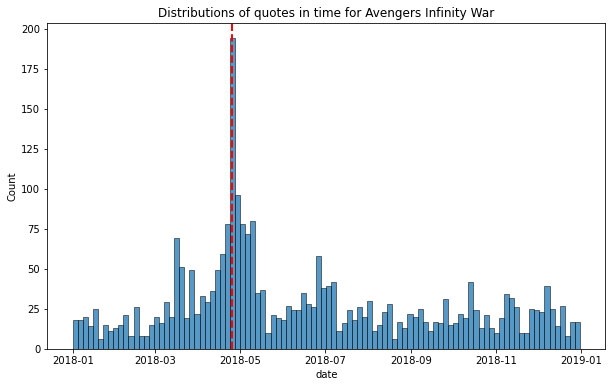

In [30]:
plt.figure(figsize = (10,6))
plt.title('Distributions of quotes in time for Avengers Infinity War')
title = 'Avengers: Infinity War'
avengers = quotes[quotes['movie']==title]
plt.axvline(movies[movies['original_title'] == title]['date_published'], color='r', linestyle='dashed', linewidth=2)
sns.histplot(data=avengers['date'], bins=100)

**Quotes on a yearly level**

Now lets examine for each year the distribution of the number of quotes in time.

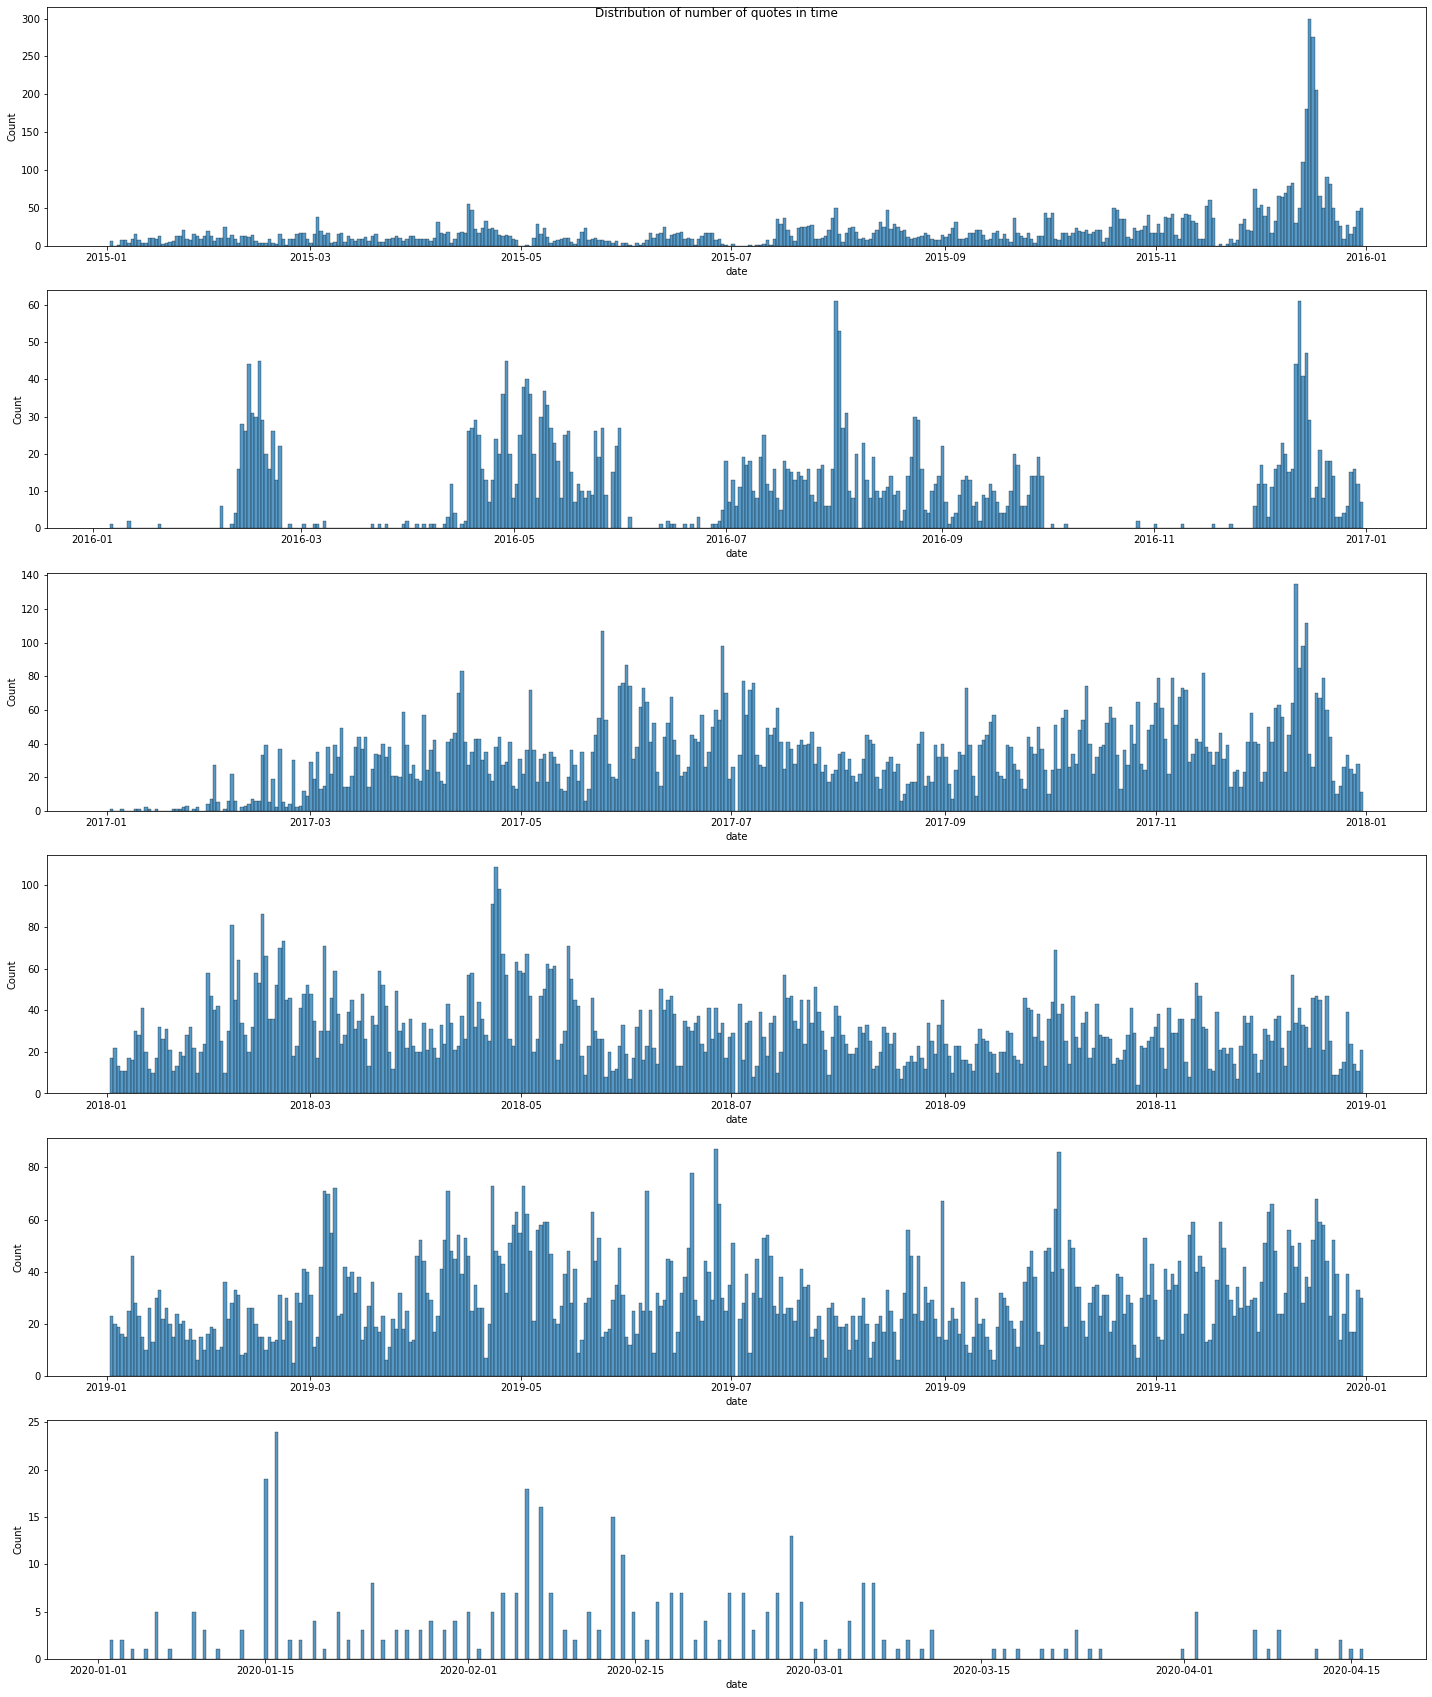

In [31]:
import datetime as dt
f, ax = plt.subplots(6,1, figsize=(20, 24))
f.suptitle('Distribution of number of quotes in time')
for i in range(6):
    from_date = 2015 + i
    to_date = 2016 + i
    sns.histplot(data=quotes[(quotes['date'] < dt.datetime(to_date,1,1)) & (quotes['date'] > dt.datetime(from_date,1,1))]['date'], bins=365, ax=ax[i])
f.tight_layout()

In [32]:
quotes['year'] = pd.DatetimeIndex(quotes['date']).year

In [33]:
for i in range(6):
    from_date = 2015 + i
    to_date = 2016 + i
    yearly = quotes[(quotes['date'] < dt.datetime(to_date,1,1)) & (quotes['date'] > dt.datetime(from_date,1,1))].groupby('date').count()['movie']
    mean = yearly.mean()
    std = yearly.std()
    max_ = yearly.max()
    print(f'{from_date} daily number of quotes:    mean: {"{:.2f}".format(mean)}     std: {"{:.2f}".format(std)}     max: {"{:.2f}".format(max_)}' )

2015 daily number of quotes:    mean: 20.18     std: 29.00     max: 300.00
2016 daily number of quotes:    mean: 13.85     std: 11.65     max: 61.00
2017 daily number of quotes:    mean: 34.18     std: 21.25     max: 135.00
2018 daily number of quotes:    mean: 30.77     std: 15.94     max: 109.00
2019 daily number of quotes:    mean: 30.96     std: 15.96     max: 87.00
2020 daily number of quotes:    mean: 4.31     std: 4.39     max: 24.00


Text(0.5, 0.98, 'Boxplot of number of quotes on daily basis')

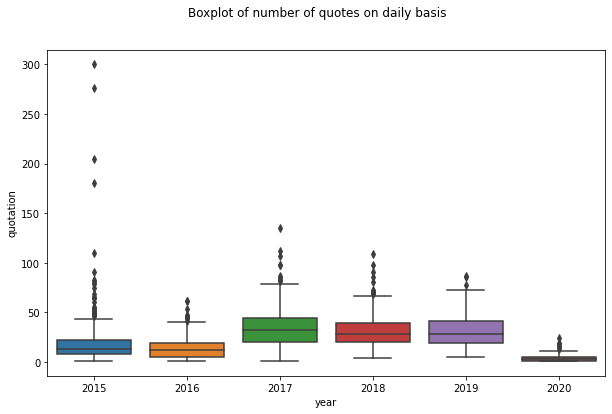

In [34]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
boxplot = quotes.groupby(['date','year'], as_index=False).count()[['year', 'quotation']]
sns.boxplot(data=boxplot, x='year', y='quotation')
f.suptitle('Boxplot of number of quotes on daily basis')

Remove outliers

Text(0.5, 0.98, 'Boxplot of number of quotes on daily basis')

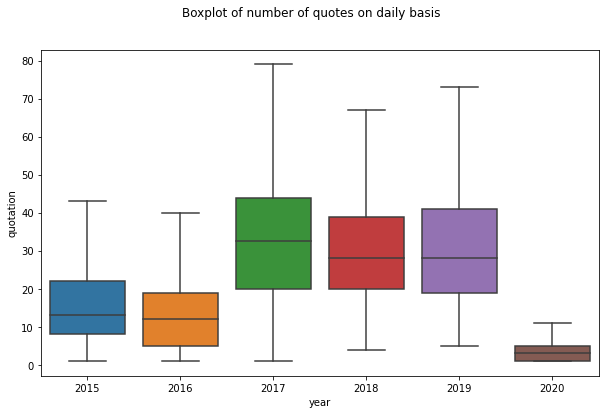

In [35]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
sns.boxplot(data=boxplot, x='year', y='quotation', showfliers=False)
f.suptitle('Boxplot of number of quotes on daily basis')

/opt/miniconda3/envs/ada/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ada/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ada/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Swarmplot of number of quotes on daily basis')

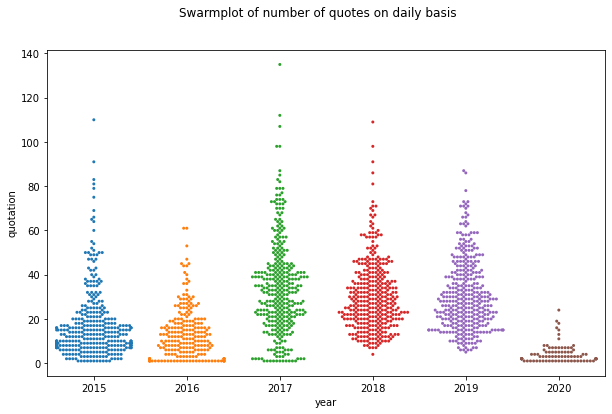

In [36]:
f, ax = plt.subplots(1,1, figsize=(10, 6))
swarmplot = boxplot[boxplot['quotation']<150]
sns.swarmplot(data=swarmplot, x='year', y='quotation', size=3)
f.suptitle('Swarmplot of number of quotes on daily basis')

**FUTURE WORK**

RQ1: We are reready to run a linear regression on the quotes and box office. We have everything to calculate propensity scores using logistic regression. For the control movies, we need to find movies with low box office results, but that is straightforward with the tools from **filter_quotes.ipynb** and **preprocessQuotebank.ipynb**. After calculating the propensity scores, we can do a matching with the hungarian algorithm and check if there the number of quotes differ significantly among the high and low box office movies.